In [60]:
import numpy as np
import pandas
from sklearn import tree, grid_search
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
%matplotlib inline

df = pandas.read_csv('D:\\Daniil\\titanic_3.csv', index_col='PassengerId') #Открываем файл

In [2]:
#№1
data1 = df[["Survived", "Sex"]] #Выбор необходимых для задачи столбцов
female = data1[data1['Sex'] == 'female'] #Разделение по половому признаку
male = data1[data1['Sex'] == 'male']

In [3]:
males_data = []
females_data = []
#Подсчет выживших мужчин и женщин
for i in male.stack().value_counts(): 
    males_data.append(i)
for i in female.stack().value_counts():
    females_data.append(i)
print("Males:", male.stack().value_counts())
print("Females:", female.stack().value_counts())

Males: male    577
0       468
1       109
dtype: int64
Females: female    314
1         233
0          81
dtype: int64


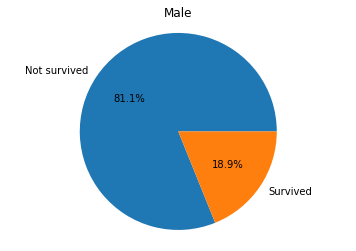

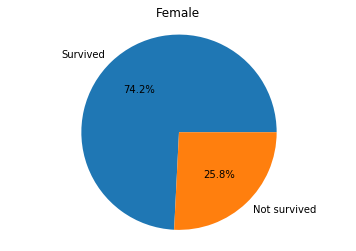

In [4]:
label = []
male_fig, male_ax = plt.subplots()
#.stack().value_counts() возвращает отсортированные по возрастанию значения
# Здась я проверяю, как они должны расположиться на диаграмме
if male.stack().value_counts()[1] > male.stack().value_counts()[0]: 
    label = ['Survived' , 'Not survived']
else:
    label = ['Not survived', 'Survived']
#Конструирование графика для данных о мужчинах
plt.title('Male')
male_ax.pie(males_data[-2:], explode=(0, 0), labels=label, autopct='%1.1f%%')
male_ax.axis('equal')

#Конструирование графика для данных о женщинах
female_fig, female_ax = plt.subplots()
if female.stack().value_counts()[1] > female.stack().value_counts()[0]:
    label = ['Survived' , 'Not survived']
else:
    label = ['Not survived', 'Survived']
plt.title('Female')
female_ax.pie(females_data[-2:], explode=(0, 0), labels=label, autopct='%1.1f%%')
female_ax.axis('equal')


plt.show() #Вывод диаграммы

In [5]:
#Женщин выжило в два раза больше, чем мужчин, не смотря на то, что всего мужчин было почти в два раза больше, чем женщин. 

In [6]:
data2 = df[["Survived", "Pclass"]] #Выбор данных, необходимых для задания
#Выборка данных по классам
PC1 = data2[data2['Pclass'] == 1]
PC2 = data2[data2['Pclass'] == 2]
PC3 = data2[data2['Pclass'] == 3]

#Печать результатов
print(PC1.stack().value_counts())
print(PC2.stack().value_counts())
print(PC3.stack().value_counts())

1    352
0     80
dtype: int64
2    184
0     97
1     87
dtype: int64
3    491
0    372
1    119
dtype: int64


In [7]:
#По какой-то причине .stack().value_counts() неправильно вычисляет данные для первого класса. Массив для него задаю вручную.
#Заполнение массивов данными о выживших по классам
PC1_data = [216, 136, 80] 
PC2_data = []
for i in PC2.stack().value_counts():
    PC2_data.append(i)
PC3_data = []
for i in PC3.stack().value_counts():
    PC3_data.append(i)

(-1.1046252352486257,
 1.1002202996789929,
 -1.1040355254571266,
 1.1052181286570089)

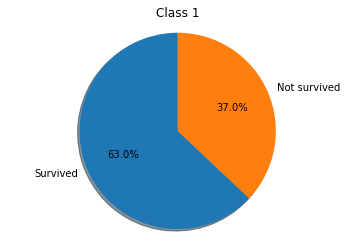

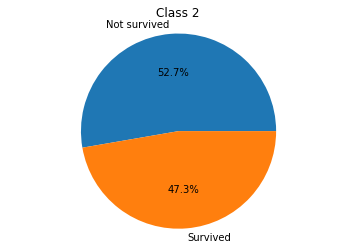

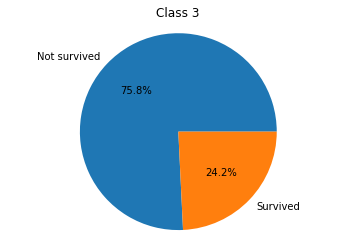

In [8]:
#Диаграмма распределения выживших/погибших в 1 классе
PC1_fig, PC1_ax = plt.subplots()
plt.title('Class 1')
PC1_ax.pie(PC1_data[-2:], explode=(0, 0), labels=['Survived' , 'Not survived'], autopct='%1.1f%%', shadow=True, startangle=90)
PC1_ax.axis('equal') 
 
#Диаграмма распределения выживших/погибших во 2 классе
PC2_fig, PC2_ax = plt.subplots()
if PC2.stack().value_counts()[1] > PC2.stack().value_counts()[0]: #Распределение выживших/погибших
    label = ['Survived' , 'Not survived']
else:
    label = ['Not survived', 'Survived']
plt.title('Class 2')
PC2_ax.pie(PC2_data[-2:], explode=(0, 0), labels=label, autopct='%1.1f%%')
PC2_ax.axis('equal')

#Диаграмма распределения выживших/погибших в 3 классе
PC3_fig, PC3_ax = plt.subplots()
if PC3.stack().value_counts()[1] > PC3.stack().value_counts()[0]: #Распределение выживших/погибших
    label = ['Survived' , 'Not survived']
else:
    label = ['Not survived', 'Survived']
plt.title('Class 3')
PC3_ax.pie(PC3_data[-2:], explode=(0, 0), labels=label, autopct='%1.1f%%')
PC3_ax.axis('equal')

In [9]:
# В первом классе процент выжихших больше всего (причем как в процентном, так и в численном соотношении)
# Во втором классе погибло чуть больше половины пассажиров
# В третьем погибло 3/4 пассажиров
# Интересно, что меньше всего на Титанике было пассажиров второго класса

In [10]:
data3 = df[["Pclass", "Fare"]] #Выбор данных для поиска зависимости между классом и ценой билета
PCF1 = data3[data3['Pclass'] == 1]
PCF2 = data3[data3['Pclass'] == 2]
PCF3 = data3[data3['Pclass'] == 3]


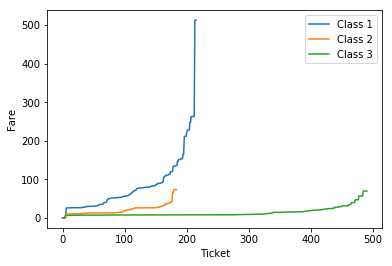

In [11]:
classes = [PCF1["Fare"].tolist(), PCF2["Fare"].tolist(), PCF3["Fare"].tolist()] #Выбор данных о цене билетов по классам
fig, ax = plt.subplots()
index = 1
for i in classes: #Задание свойств графика
    ax.plot(np.sort(i), label = 'Class ' + str(index))
    index += 1
ax.set_xlabel('Ticket')
ax.set_ylabel('Fare')
legend = ax.legend()
plt.show()

In [12]:
# Цена билетов очевидная: 1 класс > 2 класс > 3 класс
# В 3 классе у многих цена билета == 0, видимо, это обслуживающий персонал
# Во 2 классе такие билеты тоже встречаются, а вот в 1 уже нет
# Зато в 1 классе бывают очень дорогие билеты. Если во втором классе максимум в районе 80, в первом классе есть билеты за 300-500

In [13]:
#№2

In [14]:
data4 = df[['Survived', 'Sex', 'Pclass']] #Выбор данных для задачи о выживаемости в зависимости от пола и соц статуса

In [15]:
#Для мужчин
male = data4[data4['Sex']=='male'] #Данные о поле
males_class = []
for i in [1, 2, 3]:
    males_class.append(male[male['Pclass'] == i]) #Данные о классе
males_survived_class = []
for i in [0, 1, 2]:
    males_survived_class.append(males_class[i][males_class[i]["Survived"] == 1]) #Данные о выживших по полу и классу
male_results = []
#Отношение выживших к погибшим в трех классах
for i in range(3):
    male_results.append(len(males_survived_class[i]) / len(males_class[i]))

In [16]:
#Для женщин
female = data4[data4['Sex']=='female']#Данные о поле
females_class = []
for i in [1, 2, 3]:
    females_class.append(female[female['Pclass'] == i])#Данные о классе
females_survived_class = []
for i in [0, 1, 2]:
    females_survived_class.append(females_class[i][females_class[i]["Survived"] == 1])#Данные о выживших по полу и классу
female_results = []
#Отношение выживших к погибшим в трех классах
for i in range(3):
    female_results.append(len(females_survived_class[i]) / len(females_class[i]))

In [17]:
#Печать численных результатов
print(male_results)
print(female_results)

[0.36885245901639346, 0.1574074074074074, 0.13544668587896252]
[0.9680851063829787, 0.9210526315789473, 0.5]


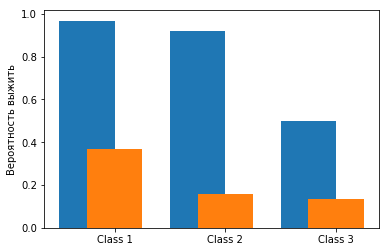

In [18]:
#Вывод результатов на график
fig, ax = plt.subplots()
dist = np.arange(1, len(female_results) + 1) #Параметры внешнего вида графика
plt.bar(dist, female_results, width = 0.5)
plt.bar(dist + 0.25, male_results, width = 0.5)
plt.xticks(dist + 0.25, dist)
ax.set_ylabel('Вероятность выжить')
ax.set_xticklabels(('Class 1', 'Class 2', 'Class 3'))
plt.show()

In [19]:
#Как уже было показано, вероятность для женщины выжить гораздо выше, чем для мужчины
#В первом и втором классе вероятность аж более 90% для женщины, и 36 и 15 для мужчины соответственно. 
#Во втором и третьем классе практически одинаковая вероятность выжить у мужчины: 15 и 13 процентов
#Такие дела...

In [20]:
#№3

In [25]:
clear_data = pandas.DataFrame(df, columns=['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']) #Выбрать все столбцы с полезной информацией
clear_data['Sex'] = clear_data['Sex'].map({'female': 0, 'male':1}).astype(int) #Замена названий полов на 1/0
clear_data.fillna(clear_data['Age'].mean(skipna=True), inplace=True)

In [26]:
#№4

In [56]:
columns = ['Pclass', 'Fare', 'Age', 'Sex', 'Parch', 'SibSp']
X, y = clear_data[columns], clear_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Делим на выборки

In [57]:
#Посмотрим, какие параметры подходят наилучшим образом
parameters = {'max_depth': np.arange(2, 10),'criterion': ('gini', 'entropy'),'min_samples_leaf': np.arange(1, 10),
                  'min_samples_split': np.arange(2, 10), 'min_weight_fraction_leaf': np.arange(0, 0.5), 
              'max_leaf_nodes': np.arange(2, 10), 'splitter' : ('best', 'random')}
search_params = GridSearchCV(DecisionTreeClassifier(), parameters)
search_params.fit(X_train, y_train)
print(search_params.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [65]:
#И построим с ними дерево
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 6, 
                              max_leaf_nodes = 9, min_samples_split = 2, min_weight_fraction_leaf = 0, splitter = 'best')
tree.fit(X_train, y_train)
#Заодно посмотрим, насколько хорошо оно работает
est_predict = tree.predict(X_test)
print(classification_report(y_test, est_predict))

             precision    recall  f1-score   support

          0       0.93      0.81      0.87       172
          1       0.72      0.90      0.80        96

avg / total       0.86      0.84      0.84       268



In [72]:
export_graphviz(tree, out_file = "best_tree.dot")

In [69]:
#5
#Проделать то же самое для рандом форест

In [70]:
#Посчитаем наилучшие параметры
parameters = {'n_estimators': np.arange(1, 50)}
search_params = GridSearchCV(RandomForestClassifier(), parameters)
search_params.fit(X_train, y_train)
print(search_params.best_params_)

{'n_estimators': 45}


In [71]:
forest = RandomForestClassifier(n_estimators = 45)
forest.fit(X_train, y_train)
#Посмотрим, насколько хорошо оно работает
est_predict = forest.predict(X_test)
print(classification_report(y_test, est_predict))

             precision    recall  f1-score   support

          0       0.91      0.87      0.89       172
          1       0.79      0.84      0.81        96

avg / total       0.87      0.86      0.86       268



In [73]:
#Результаты очень похожи, но у рандом фореста слегка выше. Средняя точность на 0.1, полнота и f на 0.2